Best paramaters gaussian= [ 2.43596394  0.22677875  1.26601682  0.02419241]
Best paramaters lorentzian= [ 2.13036141  0.22907576  1.55871473 -0.05066785]


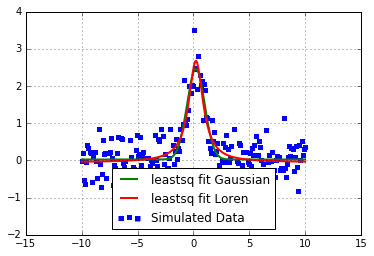

In [3]:
"""Gaussian model. This module needs 4 input parameters, that are initialising parameters:
mean gauss=mu
sigma gauss=sigma
offset=off
scaling factor=sc"""

import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib.pyplot as plt


#model definition

def gaussian(x, sc, mu, sigma, off):
        
    gauss=sc * np.exp(-(x-mu)**2 /sigma)+off
    return gauss
    
def lorentzian(x, sc, mu, FWHM, off):
        
    lor=sc*FWHM/(2*((x-mu)**2+(FWHM/2)**2))+off
    return lor
        

#simulates data

x = np.linspace(-10,10,200) 
y = gaussian(x, 2.33, 0.21, 1.51,0.0) + np.random.normal(0, 0.4, len(x))

#gaussian fit

init_vals = [1, 0, 1,0]     # for [amp, cen, wid,0ff]
best_vals_g, covar_g = curve_fit(gaussian, x, y, p0=init_vals)
print("Best paramaters gaussian=", best_vals_g)

y_fit_g=gaussian(x,best_vals_g[0],best_vals_g[1],best_vals_g[2],best_vals_g[3])


#lorentzian fit
init_vals = [1, 0, 1,0]     # for [amp, cen, wid,0ff]
best_vals_f, covar_f = curve_fit(lorentzian, x, y, p0=init_vals)
print("Best paramaters lorentzian=", best_vals_f)

y_fit_l=lorentzian(x,best_vals_f[0],best_vals_f[1],best_vals_f[2],best_vals_f[3])

#evaulate best model


##plot results

plt.scatter(x, y, c='b', marker='+',linewidth=5, color='r', label='Simulated Data')
plt.plot(x, y_fit_g, 'g', linewidth=2, label='leastsq fit Gaussian')
plt.plot(x, y_fit_l, 'r', linewidth=2, label='leastsq fit Loren')
plt.grid(which='major')
plt.legend(loc=8)
plt.show()



    